# Prueba de R en un .ipynb

Notebook para probar como es unir R y python en un mismo jupiter. Estoy dejando el yml de las librerías necesarias para crear el entorno desde conda. Luego podemos seguir actualizando el yml en caso necesitemos más librerías.

Este código encuentra la instalación de R dentro del entorno de Conda y la añade al PATH del sistema para que `rpy2` pueda encontrarla.

In [1]:
import os
import sys

# cargamos rpy2 para combinar las celdas, también se podría hacer cambiando manualmente el kernell antes de ejecutar cada celda
# Pero así es más rápido

try:
    # Obtener la ruta base del entorno de Conda
    conda_env_path = sys.prefix
    
    # Construir la ruta a la carpeta de R
    r_home_path = os.path.join(conda_env_path, 'lib', 'R')
    
    # Establecer la variable de entorno R_HOME
    print(f"Intentando establecer R_HOME en: {r_home_path}")
    os.environ['R_HOME'] = r_home_path
    
    # Cargar la extensión rpy2
    %load_ext rpy2.ipython
    
    print("\\nCarga de rpy2 completada con éxito.")
    
except Exception as e:
    print(f"\\nOcurrió un error: {e}")
    print("\\nPor favor, verifica que la ruta de R_HOME sea correcta y que 'r-base' esté instalado en tu entorno de Conda.")

Error importing in API mode: ImportError('On Windows, cffi mode "ANY" is only "ABI".')
Trying to import in ABI mode.


Intentando establecer R_HOME en: c:\Users\leoni\anaconda3\envs\env_modelos_fisio\lib\R
\nCarga de rpy2 completada con éxito.


## Celda de Python

Genera los datos, los guarda en un CSV y crea una gráfica.

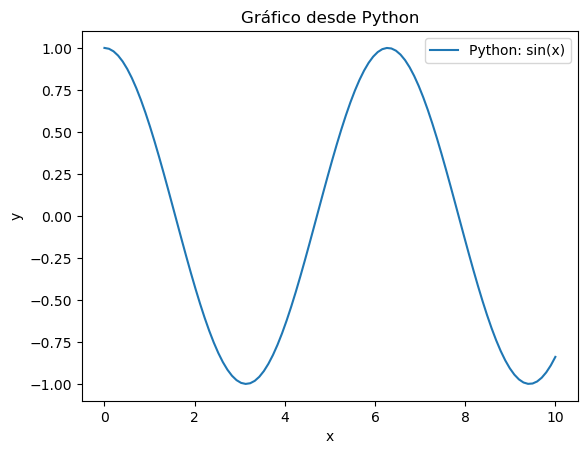

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos
x = np.linspace(0, 10, 100)
y = np.cos(x)

# Graficar en Python
plt.plot(x, y, label="Python: cos(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gráfico desde Python")
plt.legend()
plt.show()


Acá podemos pasar las variables de un lenguaje al otro

In [3]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


## Celda de R

Usa `%%R` para ejecutar código R que lee el CSV y genera la segunda gráfica.

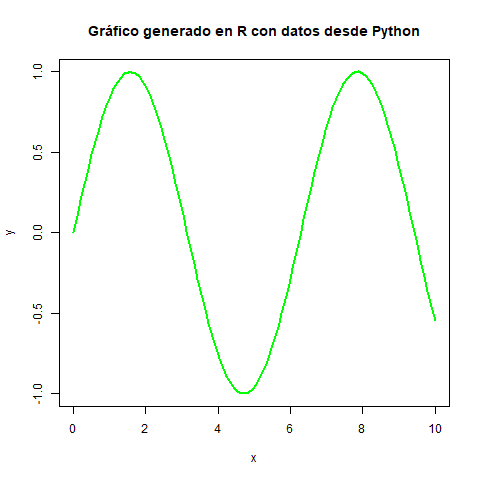

In [6]:
%%R -i x -i y
# Ahora x e y están disponibles en R
datos <- data.frame(x, y)

plot(datos$x, datos$y, type="l", col="green", lwd=2,
     main="Gráfico generado en R con datos desde Python",
     xlab="x", ylab="y")
